# Mnist MLP

## Import Modules

In [158]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image

## Load Data

Load the MNIST dataset using the Keras API. Visualize some of the data.

In [159]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

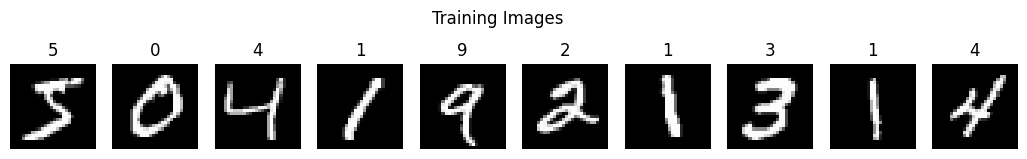

In [160]:
# Visualize some of the data
def plot_images(images, labels, title):
    plt.figure(figsize=(13, 2))  # Size of the plot
    plt.suptitle(title)  # Set the title of the plot
    for i in range(10):  # Plot the first 10 images
        plt.subplot(1, 10, i + 1)  # Create a subplot with 1 row and 10 columns and select the i+1-th position
        plt.imshow(images[i], cmap='gray')  # Show the i-th image in the plot and set the colormap to gray
        plt.title(labels[i])  # Set the title of the i-th subplot to the label of the i-th image
        plt.axis('off')  # Disable the axis of the plot
    plt.show()


plot_images(x_train, y_train[:10], "Training Images")

## Preprocess Data

The MNIST dataset consists of `70,000` `28x28` black-and-white images of handwritten digits extracted from two NIST databases. There are `60,000` images in the training dataset and `10,000` images in the validation dataset, one class per digit so a total of `10` classes, with `7,000` images (`6,000` train images and `1,000` test images) per class. Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets).

### Flatten Before Normalize

MLP requires the features to be a **1D-vector**. To fit this requirement, the `28*28` images need to be flattened into a **1D-vector** and normalized to a value between `0` and `1`. The labels also need to be converted into a `1x10` array where each row is a one-hot vector.

In [161]:
# Flatten the data and normalize
x_train = x_train.astype('float32').reshape(-1,
                                            784) / 255.0  # Flatten the images to 1x784 arrays, -1 means that the size of that dimension is determined by the other dimensions and the provided value.
x_test = x_test.astype('float32').reshape(-1, 784) / 255.0

In [162]:
# Convert labels to one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)  # Convert the labels to one-hot vectors
y_test = tf.keras.utils.to_categorical(y_test,
                                       10)  # One-hot encode means that each label is represented as a vector of length 10 where the index of the 1 is the value of the digit. For example, the label `5` would be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`.

In [163]:
print(y_train[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Create the Model

In [164]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),  # Create a model with 256 neurons in the first hidden layer
    Dense(256, activation='relu'),  # Create a model with 256 neurons in the second hidden layer
    Dense(256, activation='relu'),  # Create a model with 256 neurons in the third hidden layer
    Dense(10, activation='softmax')  # Create a model with 10 neurons in the output layer
])

## Compile the Model

In [165]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy'])  # Compile the model with the Adam optimizer, the categorical crossentropy loss function, and the accuracy metric

## Train the Model

In [166]:
model.fit(x_train, y_train, epochs=10, batch_size=128,
          validation_split=0.2)  # Train the model with 10 epochs, a batch size of 128, and a validation split of 20%. Validation split means that 20% of the training data will be used as validation data.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8461 - loss: 0.5347 - val_accuracy: 0.9562 - val_loss: 0.1401
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9667 - loss: 0.1116 - val_accuracy: 0.9646 - val_loss: 0.1131
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9808 - loss: 0.0676 - val_accuracy: 0.9715 - val_loss: 0.0927
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9860 - loss: 0.0439 - val_accuracy: 0.9720 - val_loss: 0.1017
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9892 - loss: 0.0336 - val_accuracy: 0.9728 - val_loss: 0.1033
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9918 - loss: 0.0233 - val_accuracy: 0.9703 - val_loss: 0.1142
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9913 - loss: 0.0254 - val_accuracy: 0.9735 - val_loss: 0.1075
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accu

## Save the Model

In [167]:
model.save("models/mnist_mlp.keras")  # Save the model to a file

## Evaluate the Model

In [168]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0977
Test Loss:  0.08785495907068253
Test Accuracy:  0.9793000221252441


## Make Predictions

In [169]:
import os
import glob


def predict_handwriting(model_path, image_folder):
    # Load trained model
    saved_model = tf.keras.models.load_model(model_path)

    # Get all images' paths
    image_paths = glob.glob(os.path.join(image_folder, "*.png")) + \
                  glob.glob(os.path.join(image_folder, "*.jpg")) + \
                  glob.glob(os.path.join(image_folder, "*.jpeg"))

    if not image_paths:
        print(f"No images found in {image_folder}")
        return

    # Create layout (at most 5 cols per row)
    num_images = len(image_paths)
    cols = 5
    rows = int(np.ceil(num_images / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
    if rows == 1:
        axes = axes.reshape(1, -1)

    # Set title
    fig.suptitle("Handwriting Digit Recognition Results", fontsize=16, y=1.02)

    for idx, img_path in enumerate(image_paths):
        try:
            # Preprocess image
            img = Image.open(img_path).convert('L') # transform to grayscale
            img = img.resize((28, 28))              # resize to 28x28
            img_array = np.array(img)               # transform to array

            # Normalization (cope with both black and white background)
            if 255.0 - img_array[0][0] <= 10:
                img_array = (255 - img_array) / 255.0   # if input is white background black word
            else:
                img_array = img_array / 255.0           # if input is black background white word

            # Reshape to fit MLP
            input_data = img_array.astype("float32").reshape(1, 784)

            # Make prediction
            predictions = saved_model.predict(input_data, verbose=0)
            pred_class = np.argmax(predictions)
            confidence = np.max(predictions)

            # Plot result
            ax = axes[idx // cols, idx % cols]
            ax.imshow(img, cmap='gray') # Show image
            ax.set_title(f"Pred: {pred_class}\nProb: {confidence:.2f}")
            ax.axis("off")

        except Exception as e:
            print(f"Error processing {os.path.basename(img_path)}: {str(e)}")

    # Hide empty axes
    for j in range(len(image_paths), rows * cols):
        axes[j // cols, j % cols].axis("off")

    plt.tight_layout()
    plt.show()

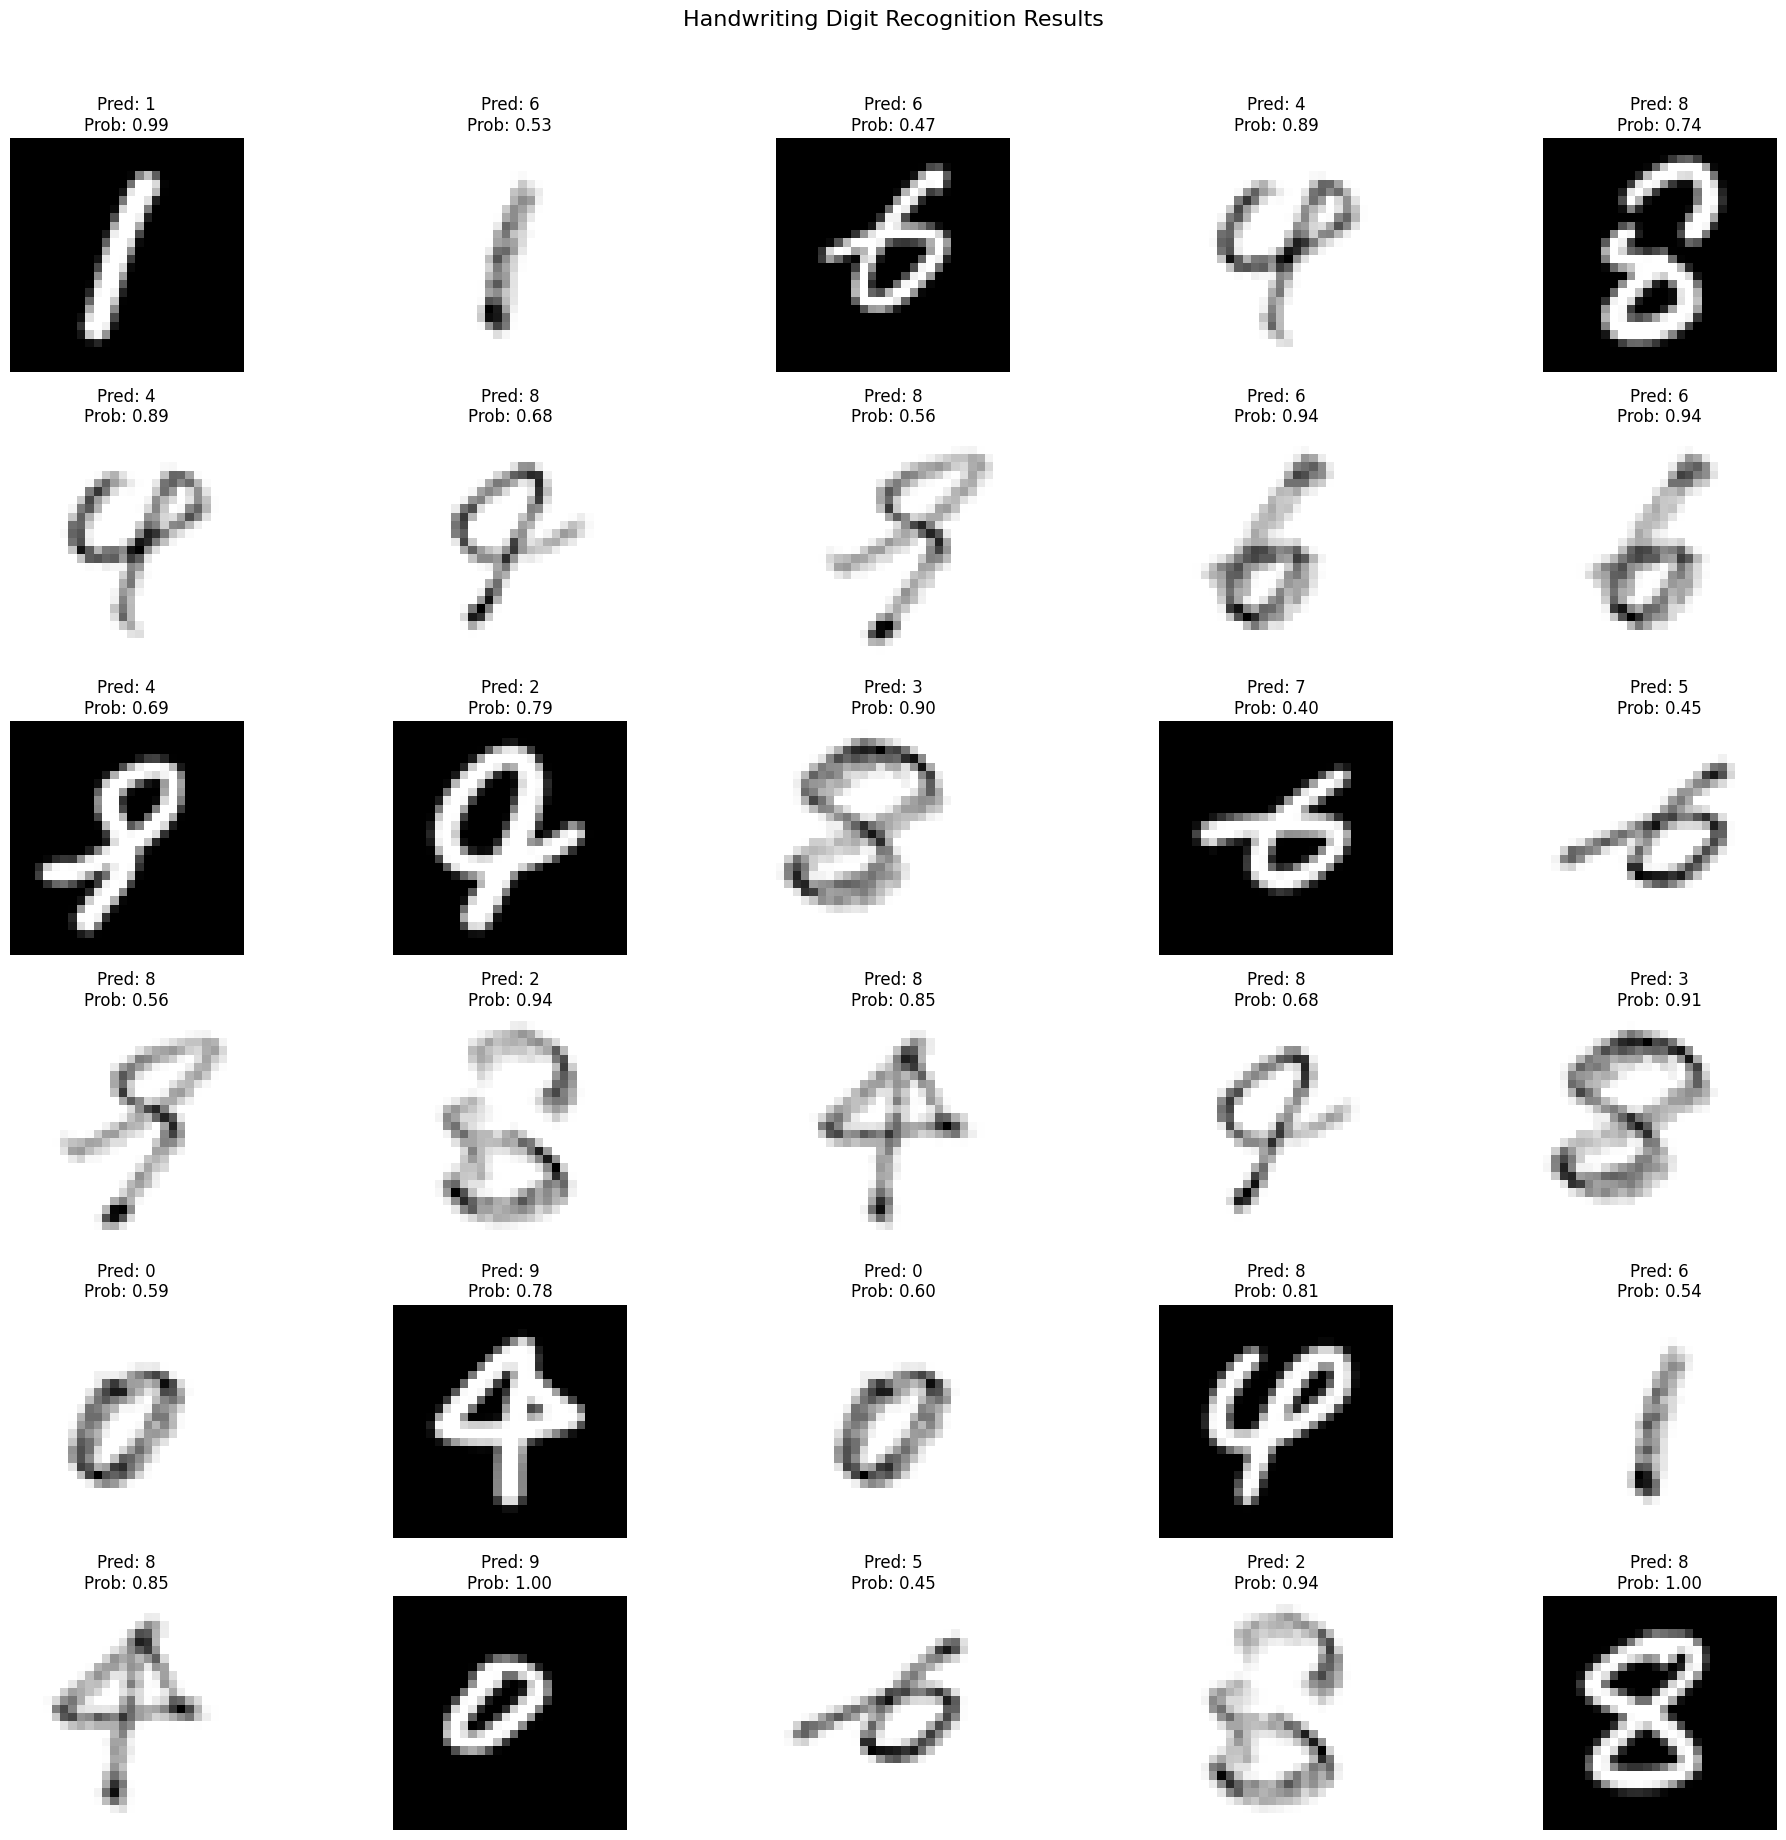

In [170]:
# Predict handwriting
predict_handwriting(
    model_path="models/mnist_mlp.keras",
    image_folder="images/handwriting"
)

## Make Augmented Images

Through data augmentation, we can generate more training data by applying random transformations to the existing training data. For example, we can randomly rotate or edit brightness of the images. This can help the model become more robust to different types of input images.

In [ ]:
# 创建增强器（根据需求调整参数）
augmenter = ImageDataGenerator(
    rotation_range=15,      # 随机旋转角度范围（度）
    brightness_range=[0.8, 1.2],  # 亮度调整范围（80%~120%）
    fill_mode='nearest'     # 填充新像素的策略
)

In [ ]:
def generate_augmented_data(images, labels, multiplier=3):
    """
    生成增强数据，原始数据保持不变
    参数：
        images: 原始图像数据 (shape: (N, 28, 28))
        labels: 对应标签
        multiplier: 增强倍数（每个样本生成的新样本数）
    返回：
        augmented_images: 增强后的图像数据
        augmented_labels: 对应的标签
    """
    # 扩展数据维度为 (N, 28, 28, 1)
    images_expanded = np.expand_dims(images, axis=-1)

    # 生成增强数据流
    aug_flow = augmenter.flow(
        images_expanded,
        labels,
        batch_size=len(images),
        shuffle=False
    )

    # 生成多批次增强数据
    augmented_images = []
    augmented_labels = []
    for _ in range(multiplier):
        aug_img, aug_lab = next(aug_flow)
        augmented_images.append(aug_img)
        augmented_labels.append(aug_lab)

    # 合并数据并恢复形状
    augmented_images = np.concatenate(augmented_images, axis=0)
    augmented_labels = np.concatenate(augmented_labels, axis=0)
    augmented_images = augmented_images.squeeze()  # 去除通道维度 (N, 28, 28)

    return augmented_images, augmented_labels

In [ ]:
# 加载原始数据（保持不变）
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 生成增强数据（每个训练样本生成3个增强样本）
aug_x, aug_y = generate_augmented_data(x_train, y_train, multiplier=3)

# 合并原始数据和增强数据
strengthened_x = np.concatenate([x_train, aug_x], axis=0)
strengthened_y = np.concatenate([y_train, aug_y], axis=0)

# 可选：打乱增强后的数据集
indices = np.random.permutation(len(strengthened_x))
strengthened_x = strengthened_x[indices]
strengthened_y = strengthened_y[indices]


In [ ]:
print("原始训练集形状:", x_train.shape)  # 应显示 (60000, 28, 28)
print("增强数据形状:", aug_x.shape)     # 应显示 (180000, 28, 28)
print("强化后总数据量:", strengthened_x.shape)  # 应显示 (240000, 28, 28)


In [ ]:
plt.figure(figsize=(10,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(aug_x[i], cmap='gray')
    plt.title(f"Label: {aug_y[i]}")
plt.show()

## Image Color Adjustment

This is a tool for me to adjust the color of my handwriting images captured in Goodnotes.

In [171]:
def process_images(folder_path):
    # 定义颜色映射规则
    color_mapping = {
        (48, 48, 48): (0, 0, 0),
        (252, 252, 252): (255, 255, 255)
    }

    # 遍历文件夹下所有jpeg文件
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            try:
                img_path = os.path.join(folder_path, filename)
                with Image.open(img_path) as img:
                    # 转换为RGB模式（处理可能存在的PNG alpha通道）
                    rgb_img = img.convert('RGB')

                    # 转换为NumPy数组进行操作
                    img_array = np.array(rgb_img)

                    # 创建掩模进行批量替换
                    mask_48 = (img_array == [48, 48, 48]).all(axis=-1)
                    mask_252 = (img_array == [252, 252, 252]).all(axis=-1)

                    img_array[mask_48] = [0, 0, 0]
                    img_array[mask_252] = [255, 255, 255]

                    # 保存处理后的图像（保留原始格式）
                    result_img = Image.fromarray(img_array)
                    save_path = os.path.join(folder_path, f"processed_{filename}")
                    result_img.save(save_path)
                    print(f"Processed: {filename} -> {save_path}")

            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")


# 使用示例
should_execute = False
if should_execute:
    process_images("images/handwriting")
